# Mini Projeto - Machine Learning

## 2ª Etapa: Classificação dos dígitos 1 x 5

### Vizualização de todos os dados

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from linear_models import *
from utils import *
from sklearn.metrics import classification_report

In [15]:
new_train_df = pd.read_csv('./dados/train_reduced.csv')
new_test_df = pd.read_csv('./dados/test_reduced.csv')

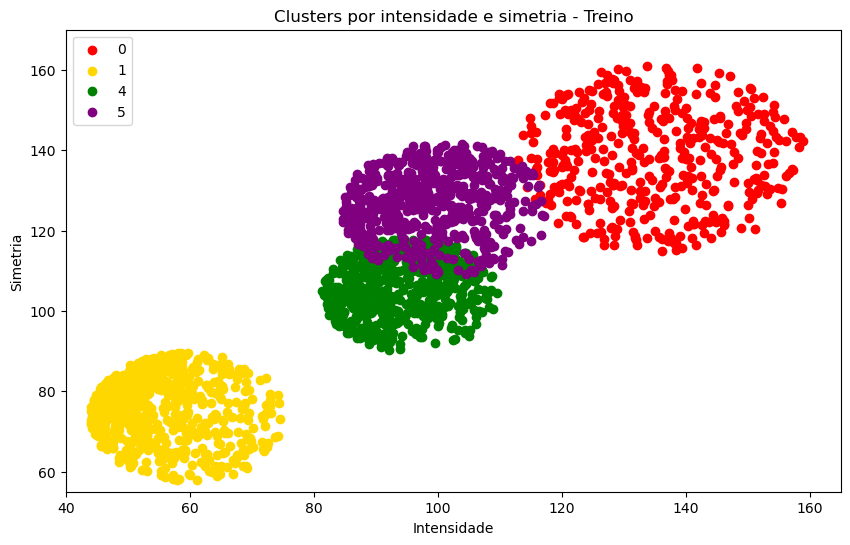

In [16]:
plot_classification_digits(new_train_df, [0, 1, 4, 5],
                              'Clusters por intensidade e simetria - Treino')

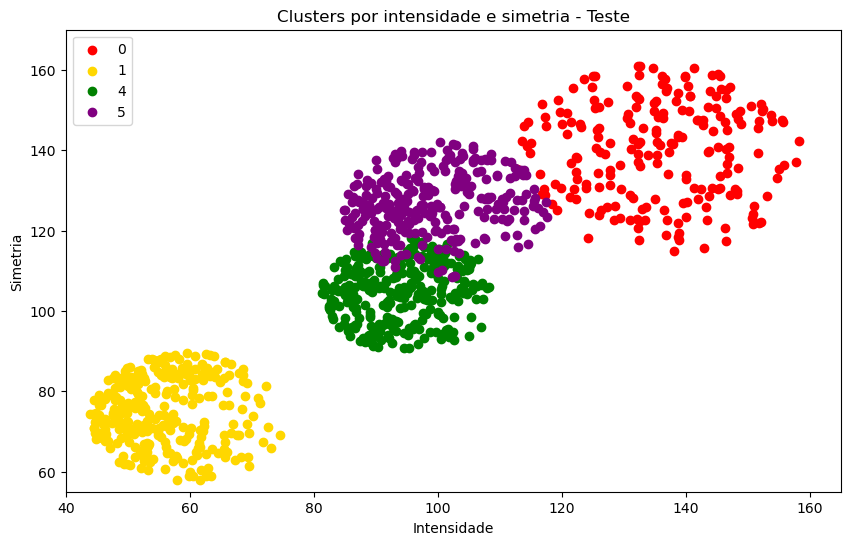

In [17]:
plot_classification_digits(new_test_df, [0, 1, 4, 5],
                              'Clusters por intensidade e simetria - Teste')

In [18]:
mask1 = new_train_df['label'] == 5
mask2 = new_train_df['label'] == 1
mask3 = new_test_df['label'] == 5
mask4 = new_test_df['label'] == 1

In [19]:
train1x5 = new_train_df[mask1 | mask2]
test1x5 = new_test_df[mask3 | mask4]

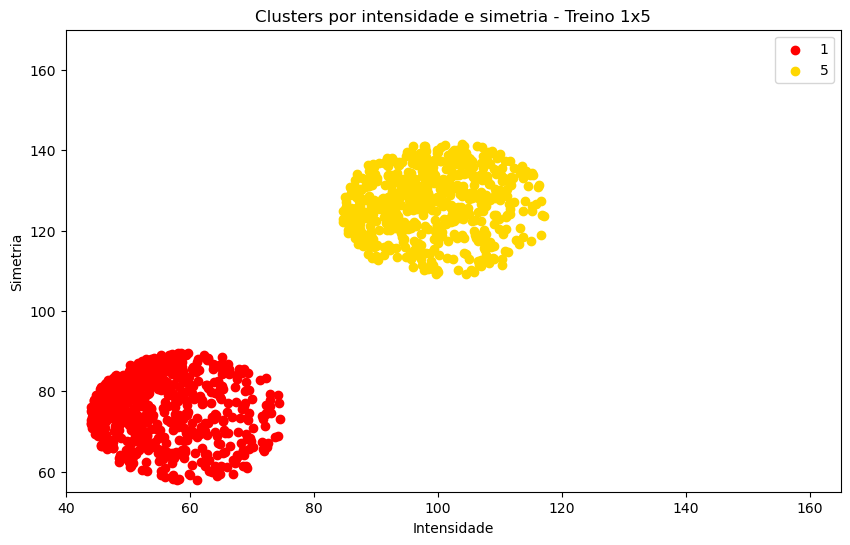

In [20]:
plot_classification_digits(train1x5, [1, 5], 'Clusters por intensidade e simetria - Treino 1x5')

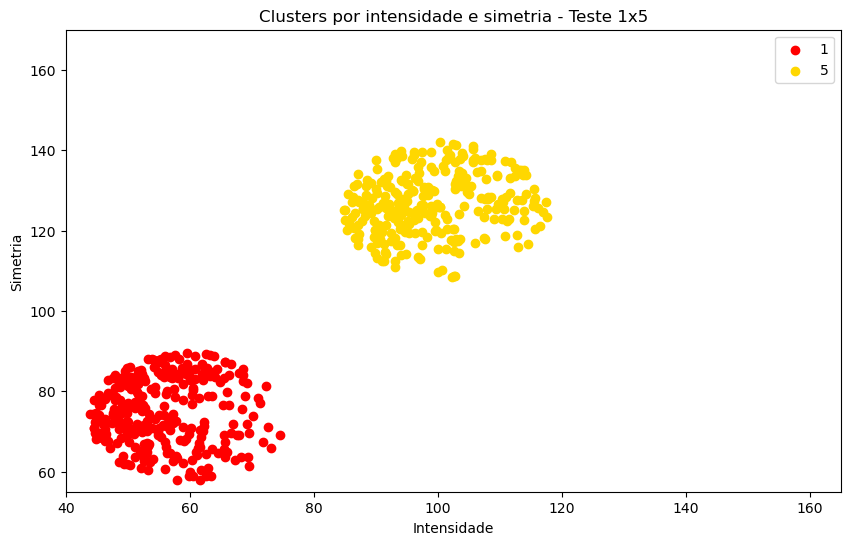

In [21]:
plot_classification_digits(test1x5, [1, 5], 'Clusters por intensidade e simetria - Teste 1x5')

In [22]:
X_train = train1x5[['intensidade', 'simetria']]
X_train = X_train.to_numpy()
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = test1x5[['intensidade', 'simetria']]
X_test = X_test.to_numpy()
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

y_train = [1 if label == 1 else -1 for label in train1x5.label]
y_test = [1 if label == 1 else -1 for label in test1x5.label]

### Relatorio Modelos

---------------------------------
RELATORIO CLASSIFICACAO MULTICLASS
_______________________________________________________
Acurracy: 1.0000
Error de Classificacao: 0.0000
_______________________________________________________
_______________________________________________________
Precision para digito -1: 1.0000
Recall para digito -1: 1.0000
F1 Score para digito -1: 1.0000
_______________________________________________________
_______________________________________________________
Precision para digito 1: 1.0000
Recall para digito 1: 1.0000
F1 Score para digito 1: 1.0000
_______________________________________________________
Weighted F1 Score: 1.0000
---------------------------------


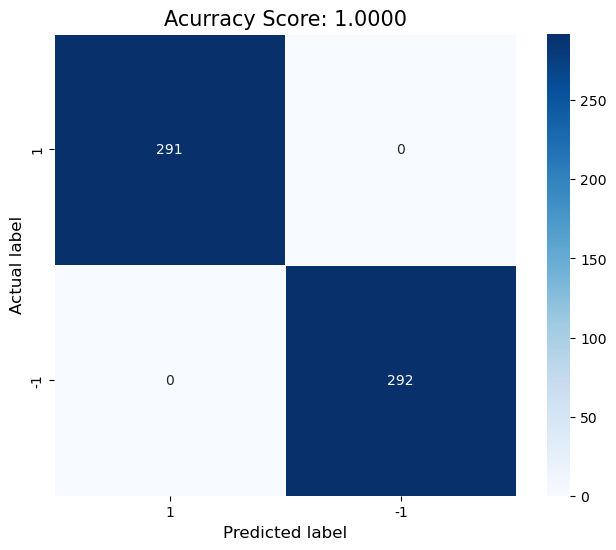

In [23]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred = linear_reg.predict(X_test)
metrics = Metrics_multiclass([1, -1])
metrics.print_metrics_multiclass(y_test, y_pred)

100%|██████████| 1000/1000 [00:01<00:00, 501.30it/s]


---------------------------------
RELATORIO CLASSIFICACAO MULTICLASS
_______________________________________________________
Acurracy: 0.0017
Error de Classificacao: 0.0000
_______________________________________________________
_______________________________________________________
Precision para digito -1: 1.0000
Recall para digito -1: 1.0000
F1 Score para digito -1: 1.0000
_______________________________________________________
_______________________________________________________
Precision para digito 1: 1.0000
Recall para digito 1: 1.0000
F1 Score para digito 1: 1.0000
_______________________________________________________
Weighted F1 Score: 1.0000
---------------------------------


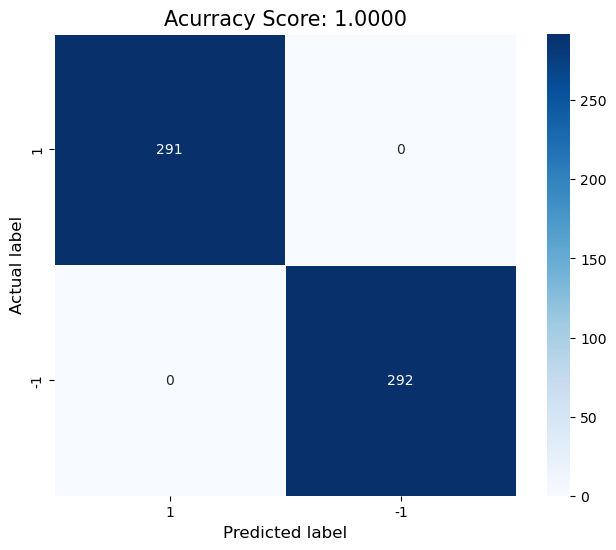

In [24]:
Nmin = np.ceil(X_train.shape[0] * 0.2).astype(int)
Nmax = np.ceil(X_train.shape[0] * 0.5).astype(int) 

pocket_pla = PocketPLA(1000, Nmin=Nmin, Nmax=Nmax)
pocket_pla.fit(X_train, y_train)
y_pred = pocket_pla.predict(X_test)
metrics = Metrics_multiclass([1, -1])
metrics.print_metrics_multiclass(y_test, y_pred)

  0%|          | 0/100000 [00:00<?, ?it/s]c:\Users\Guilherme\Documents\Faculdade\p5\projetoML\linear_models.py:120: RuntimeWarning: overflow encountered in exp
  sigm = 1 / (1 + np.exp(y_batch * np.dot(w, X_batch.T).reshape(-1, 1)))
100%|██████████| 100000/100000 [00:11<00:00, 8339.36it/s]


---------------------------------
RELATORIO CLASSIFICACAO MULTICLASS
_______________________________________________________
Acurracy: 1.0000
Error de Classificacao: 0.0000
_______________________________________________________
_______________________________________________________
Precision para digito -1: 1.0000
Recall para digito -1: 1.0000
F1 Score para digito -1: 1.0000
_______________________________________________________
_______________________________________________________
Precision para digito 1: 1.0000
Recall para digito 1: 1.0000
F1 Score para digito 1: 1.0000
_______________________________________________________
Weighted F1 Score: 1.0000
---------------------------------


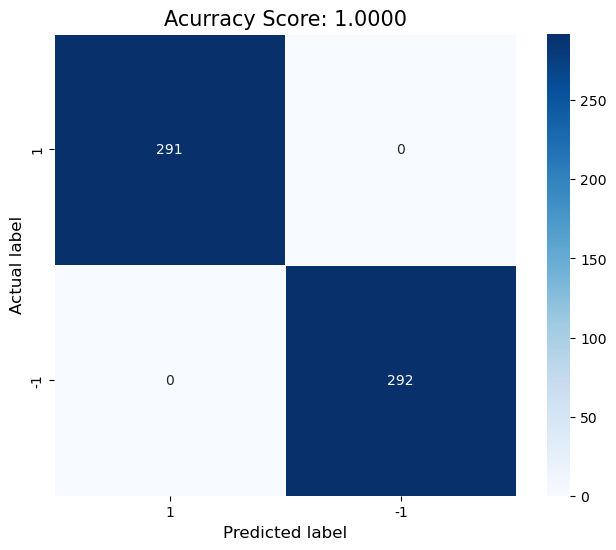

In [25]:
logistic_reg = LogisticRegression(iter=100000, batch_size=256)
logistic_reg.fit(X_train, y_train)
y_pred = logistic_reg.predict(X_test)
metrics = Metrics_multiclass([1, -1])
metrics.print_metrics_multiclass(y_test, y_pred)
# plot_classification_digits(test1x5, [1, 5], 'LOGISTICA - Classificacao - Teste 1x5', W=[logistic_reg.get_w()])

In [26]:
w_lin = linear_reg.get_w()
w_pocket = pocket_pla.get_w()
w_logistic = logistic_reg.get_w()

### Comparação entre as retas classificadoras

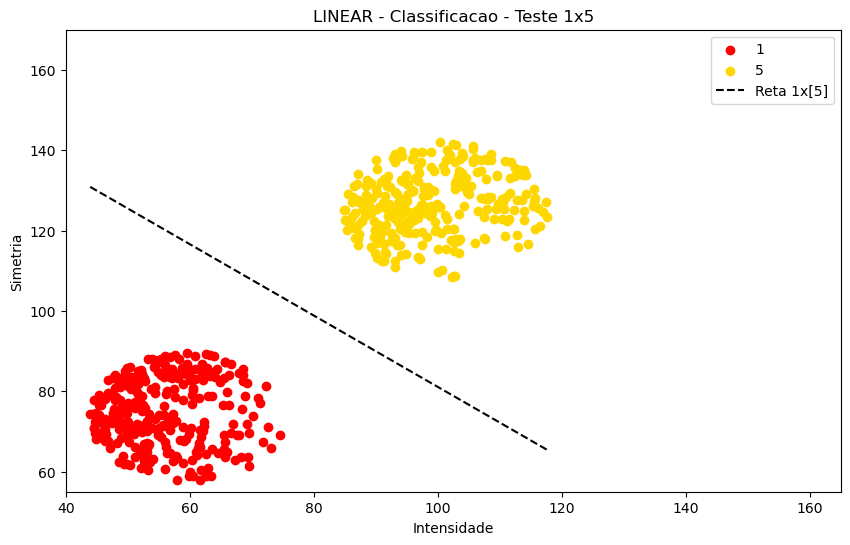

In [27]:
plot_classification_digits(test1x5, [1, 5], 'LINEAR - Classificacao - Teste 1x5', W=[w_lin])

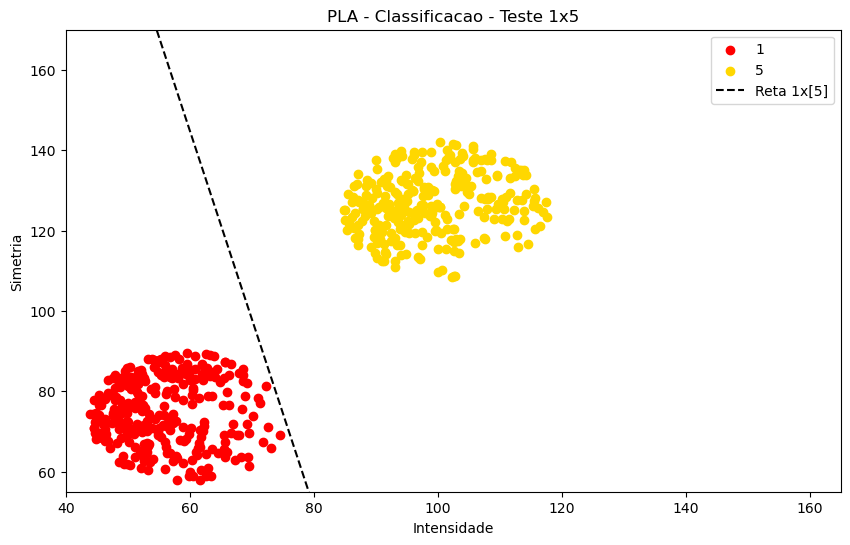

In [28]:
plot_classification_digits(test1x5, [1, 5], 'PLA - Classificacao - Teste 1x5', W=[w_pocket])

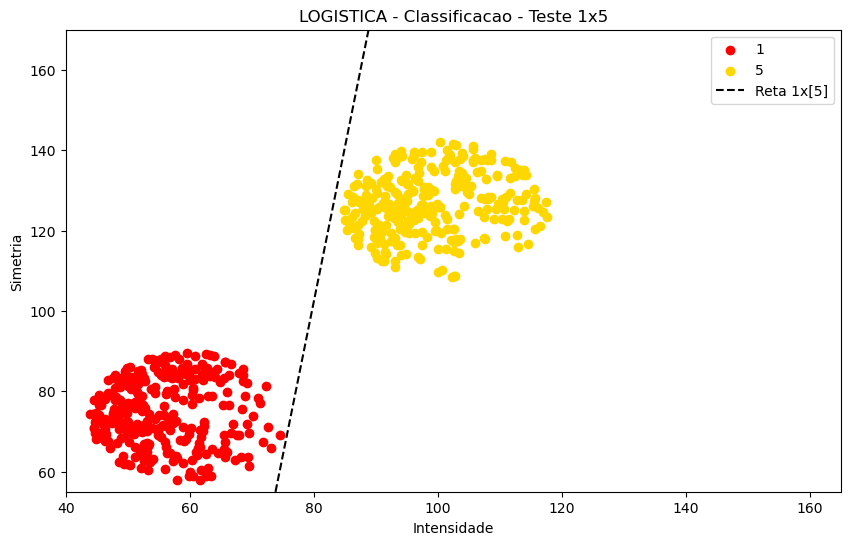

In [29]:
plot_classification_digits(test1x5, [1, 5], 'LOGISTICA - Classificacao - Teste 1x5', W=[w_logistic])